In [1]:
from thematic_alignment import yearly_alignment
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
papers_df = pd.read_csv("../data/plos_computational_biology_papers_alignment.csv")

In [3]:
papers_df.describe()

,year,alignment_score
count,300.000000,300.000000
mean,2013.413333,0.840958
std,5.298055,0.063475
min,2005.000000,0.571344
25%,2009.000000,0.808495
50%,2013.000000,0.849839
75%,2018.000000,0.887586
max,2025.000000,0.953494


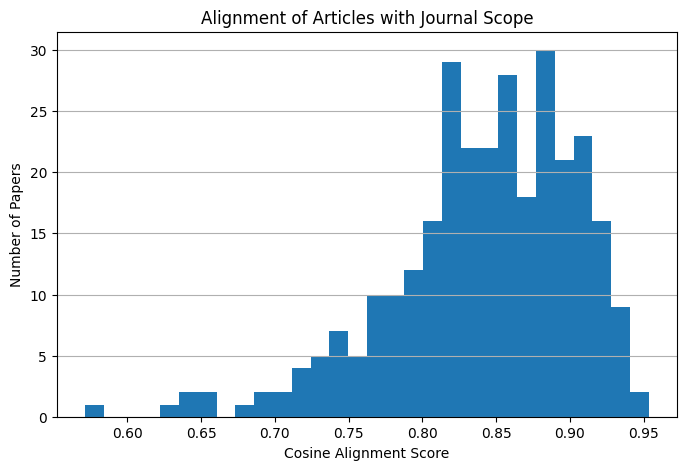

In [4]:
# Plot histogram of alignment scores
plt.figure(figsize=(8,5))
plt.hist(papers_df["alignment_score"], bins=30)
plt.xlabel("Cosine Alignment Score")
plt.ylabel("Number of Papers")
plt.title("Alignment of Articles with Journal Scope")
plt.grid(axis='y')
plt.show()

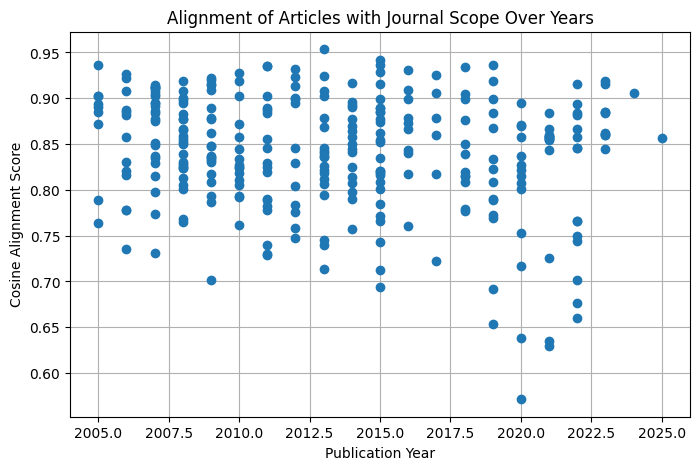

In [5]:
# Plot alignment score over years
plt.figure(figsize=(8,5))
plt.plot(papers_df['year'], papers_df["alignment_score"], 'o')
plt.xlabel("Publication Year")
plt.ylabel("Cosine Alignment Score")
plt.title("Alignment of Articles with Journal Scope Over Years")
plt.grid(True)
plt.show()

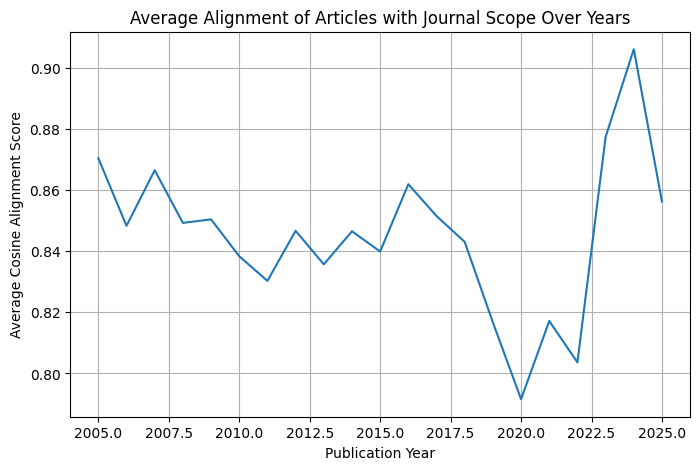

In [6]:
# Plot average alignment score over the years
yearly_mean_alignment_df = yearly_alignment(papers_df)

plt.figure(figsize=(8,5))
plt.plot(yearly_mean_alignment_df['year'], yearly_mean_alignment_df["mean_alignment_score"])
plt.xlabel("Publication Year")
plt.ylabel("Average Cosine Alignment Score")
plt.title("Average Alignment of Articles with Journal Scope Over Years")
plt.grid(True)
plt.show()

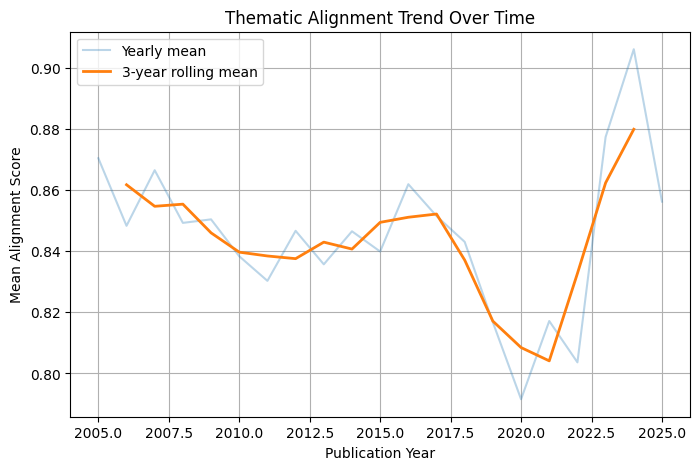

In [9]:
# Plot rolling mean to smooth the trend over years
yearly_mean_alignment_df["rolling_alignment_score"] = yearly_alignment(yearly_mean_alignment_df, rolling=3)
# print(yearly_alignment(papers_df, rolling=3))

plt.figure(figsize=(8, 5))
plt.plot(yearly_mean_alignment_df["year"], yearly_mean_alignment_df["mean_alignment_score"], alpha=0.3, label="Yearly mean")
plt.plot(yearly_mean_alignment_df["year"], yearly_mean_alignment_df["rolling_alignment_score"], linewidth=2, label="3-year rolling mean")

plt.xlabel("Publication Year")
plt.ylabel("Mean Alignment Score")
plt.title("Thematic Alignment Trend Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Setting threshold for outliers (top and bottom 1% in this case)
low_threshold = papers_df["alignment_score"].quantile(0.01)
high_threshold = papers_df["alignment_score"].quantile(0.99)

# Identify outlier papers
low_outliers = papers_df[papers_df["alignment_score"] <= low_threshold]
high_outliers = papers_df[papers_df["alignment_score"] >= high_threshold]

In [13]:
low_outliers.sort_values(by="alignment_score")

,title,abstract,year,venue,embedding,alignment_score
287,Ten Simple Rules for organizing a non–real-tim...,The present work describes the 100% virtual AT...,2020,PLoS Comput. Biol.,[-4.16629240e-02 2.39275005e-02 4.12635691e-...,0.571344
1,PLoS Computational Biology Issue Image | Vol. ...,The tomato flowers are characterized by posses...,2021,PLoS Computational Biology,[ 1.02197323e-02 1.83736833e-04 -1.23675549e-...,0.629383
0,PLoS Computational Biology Issue Image | Vol. ...,The tomato flowers are characterized by posses...,2021,PLoS Computational Biology,[ 1.16199693e-02 6.49478636e-04 -1.25598041e-...,0.635306


In [14]:
high_outliers.sort_values(by="alignment_score", ascending=False)

,title,abstract,year,venue,embedding,alignment_score
148,How Can PLOS Computational Biology Help the Bi...,A year has passed since I took over as the Edi...,2013,PLoS Comput. Biol.,[-2.20005643e-02 3.39409970e-02 -3.44212465e-...,0.953494
169,Advancements and Challenges in Computational B...,Computational biology has soared from being an...,2015,PLoS Comput. Biol.,[-1.57059561e-02 3.41384597e-02 -3.15986946e-...,0.941506
147,Ten Years of PLoS‡ Computational Biology: A De...,‡ Since the founding of PLoS Computational Bio...,2015,PLoS Comput. Biol.,[-3.00707296e-02 4.32319008e-02 -2.70076226e-...,0.936490
